# 智商遗传的平均回归效应
# Regression to the Mean Effect in the Genetic Transmission of Intelligence

以下的代码被运行于装在 *优麒麟 (Ubuntu Kylin) 19.10 64 位* 的 *SageMath 8.9*。

The code below was executed on *Ubuntu Kylin 19.10 64 bit* and *SageMath 8.9*.

## 遗传模型
## Inheritance or genetic transmission model

很多表型，如身高，如智商，的遗传都是多基因的，而且大多的差都是线性可加的，基因互相之间的效应量与线性可加的效应量相比是很小的。

The genetic mechanism for many phenotypes, like height, like intelligence, is polygenic, with much of the variance linear additive, the effect size on the phenotype of gene-gene interactions is much smaller than the linear additive effect size.

根据此，我们构建一个简化的遗传模型。假设有 $n$ 互相独立的影响智商的基因，我们也假设我们关注的特征的每一个基因的表达都是显性的，即只要分别来自父母的俩等位基因有一个是显性的，就会有正向的特征表型效应。所以如果婴儿在某一个基因是 Aa 或 aA 或 AA 都会有同样程度的正向效应。同样，我们也假设每个基因的正向效应量都是同等的。可以把每个基因视为随机变量，正的时候是 $1$，负的时候是 $0$。

Based on this, we construct a simplistic inheritance model. Assume $n$ mutually independent genes affecting intelligence，and also we assume that every gene pertaining to the phenotype in question as expresses itself dominantly, namely that so long as one of the two alleles (one from father, one from mother) is dominant, there will be a positive gene expression of the phenotype. With this, if the offspring is Aa or aA or AA in some gene, the gene expression effect will be the same. Similarly, we assume that the magnitude of positive effect on the phenotype is the same in every gene. We can see see every gene as a random variable that is $1$ when turned on and $0$ when turned off.

### 基因互换
### Genetic recombination

每个基因都是双倍体，一个来自精子，另一个来自卵子，俩单倍细胞。这些性细胞来自减数分裂，在其过程中，常染色体中的每一个双倍体基因会在染色体互换中随机从两个选一个。我们为了简单会忽略掉性染色体对该特征的效应。

Every gene is a diploid, with one allele from the sperm and the other from the ovum, noting that sperm and ovum are both haploid cells. These haploid cells originate from meiosis, in the process of which, every (diploid) gene in the autosomes will have one of the two alleles randomly selected, done during chromosomal crossover. We for simplicity will ignore the effect of the sex chromosomes on the phenotype.

我们将这些互相独立，另一角度就是父母之间没有协差方，将$p$为正的概率，从这个不难算出胚胎的任意基因有正向影响的概率为

We set these to be mutually independent, or in other words, with no covariance between the father and mother at any specific gene, defining $p$ as the probability of a positive in a gene in a haploid. From these assumuptions, it is easy to see that for any gene in the embryo, the probability that its corresponding allele with a positive effect on the phenotype is
$$
u := 1 - (1-p)^2 = p(2-p)
$$

一个概率为 $u$ 的二值随机变量的差方是

A binary variable with probability $u$ has variance
$$Var(X_i) = u(1-u)$$


通过中心极限定理，我们得以所有基因的$u$的平均的差方为

By the central limit theorem, we get that the variance fo the mean values of all the genes is
$$
Var\left(\frac{\sum X_i}{n}\right) = \frac{1}{n^2}\cdot nu(1-u)
$$

并接近于正太分部，则若 $Z$ 为标准差，正向基因的平均数量为

and that its distribution is approximate to a normal distribution. Thus, if $Z$ is the number of standard deviations relative to the mean, the average number of positive effect genes would be
$$
f(Z) = u + Z\sqrt{\frac{u(1-u)}{n}}
$$

我们把 $u$ 叫做**正基因概率**。

We will call $u$ **positive gene probability**.

In [12]:
var('p,u,Z,Z1,Z2,n')
u = p*(2-p)
f = u+Z*sqrt(u*(1-u)/n)

我们再设 $Z_1, Z_2$ 为父母的标准差，将其代进 $f$ 得以父母的正基因概率。

We define $Z_1, Z_2$ to the standard deviation scores of the parents. They will be substituted into $f$ to get the positive gene probability of the parents. 

In [7]:
r = f.subs(Z == Z1)
s = f.subs(Z == Z2)

以下我们设 $q$ 为当一个基因是正时，它为显性纯合子的概率。

Below we define $q$ to be the probability that conditioned ona positive effect allele for the gene, the allele is dominant homozygous.  

In [8]:
q = p/(p+2*(1-p))

又计算一下胚胎的正基因概率。

And also calculate the positive gene probability of the embryo.

In [9]:
p_child = r*s*(q + (1-q)*(0.5+0.5*(q+0.5*(1-q)))) + (r*(1-s)+s*(1-r))*(q + 0.5*(1-q))

算出胚胎的 Z 分数或标准差

Calculate the embryo's Z score or standard deviation.

In [19]:
z_offspring = (p_child - u) / sqrt(u*(1-u)/n)

设 $n = 10^4，p = 0.5$，看看俩三个标准差高于平均（大约千人之一）的父母的孩子的期望 Z 分数是多少。

Set $n = 10^4，p = 0.5$, see the expected Z score of the offspring of parents who are 3 SD above the mean (about 1 in 1000).

In [20]:
z_offspring.subs(Z1=3,Z2=3,p=0.5,n=10^4)

1.98267949192431

以下我们看到胚胎的标准差基本线地性回归到平均，相对于父母。

Below, we can see that the embryo's standard deviation regresses linearly to the mean, relatively to the parent.

Graphics object consisting of 1 graphics primitive


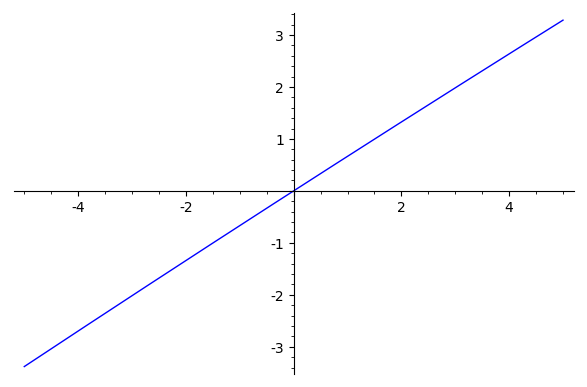

平均回归函数应用到智商


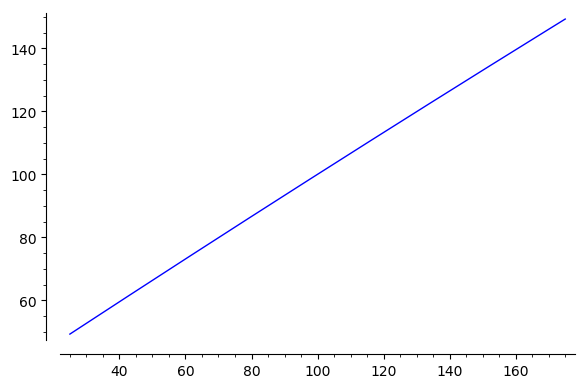

In [118]:
# P = plot(sin, (0,10)); print(P)
def regression_function(parental_z_score):
    return z_offspring.subs(Z1=parental_z_score,Z2=parental_z_score,p=0.5,n=10^4)

P = plot(regression_function, (-5,5)); print(P)
P.show()

def iq_regression(parental_iq):
    parental_z_score = (parental_iq - 100) / 15
    return 100 + 15*regression_function(parental_z_score)

print("平均回归函数应用到智商")
iq_regression_plot = plot(iq_regression, (25, 175))
iq_regression_plot.show()

回归因子为

The factor of regression is

在 Z=1 的平均回归因子： 0.664742
在 Z=-1 的平均回归因子： 0.668591


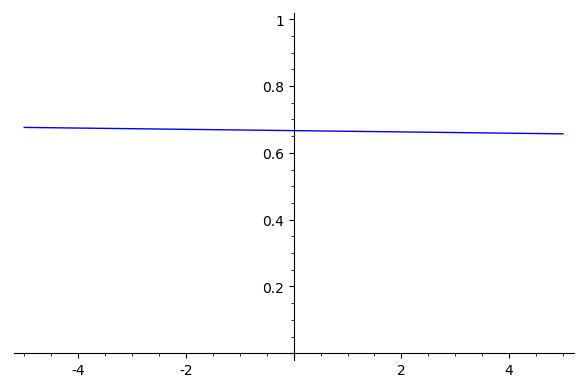

Regression coefficient very close to 0: 0.666666


In [49]:
print("在 Z=1 的平均回归因子： %f" % (z_offspring.subs(Z1=1,Z2=1,p=0.5,n=10^4) / 1))
print("在 Z=-1 的平均回归因子： %f" % (z_offspring.subs(Z1=-1,Z2=-1,p=0.5,n=10^4) / -1))

# P = plot(sin, (0,10)); print(P)
def regression_factor(parental_z_score):
    return z_offspring.subs(Z1=parental_z_score,Z2=parental_z_score,p=0.5,n=10^4) / parental_z_score

P = plot(regression_factor, (-5,5))
P.show(ymin=0, ymax=1)

epsilon = 10^-4
regression_coeff = z_offspring.subs(Z1=epsilon,Z2=epsilon,p=0.5,n=10^4) / epsilon
print("Regression coefficient very close to 0: %f" % regression_coeff)

In [88]:
mu_prob = u.subs(p=0.5)
print("正基因概率平均：%f" % mu_prob)
sigma_prob = sqrt(u*(1-u)/n).subs(p=0.5, n=10^4)
print("正基因概率标准差：%f" % sigma_prob)

正基因概率平均： 0.750000
正基因概率标准差 0.004330


In [71]:
distribution = RealDistribution('gaussian', 1)

def get_normal_values(mu, sigma):
    return lambda x: distribution.distribution_function((x-mu)/sigma)
    
def get_normal_values_regressed(mu, sigma):
    return lambda x: distribution.distribution_function(regression_coeff*(x-mu)/sigma)

In [114]:
iq_pdf = lambda x: distribution.distribution_function((x-100)/15)
iq_regressed_pdf = lambda x: distribution.distribution_function(regression_coeff*(x-100)/15)
prob_pdf = lambda x: distribution.distribution_function((x-mu_prob)/sigma_prob)
prob_regressed_pdf = lambda x: distribution.distribution_function(regression_coeff*(x-mu_prob)/sigma_prob)

正基因概率及其回归概率密度函数


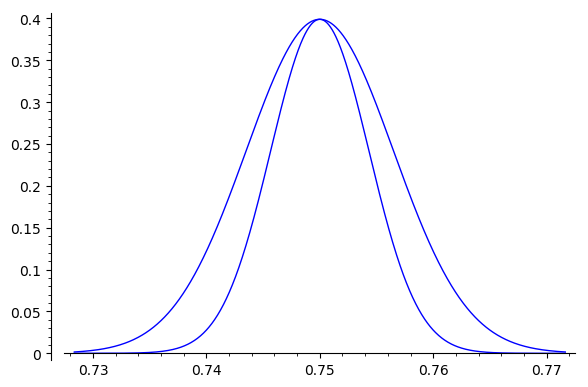

智商及其回归概率密度函数


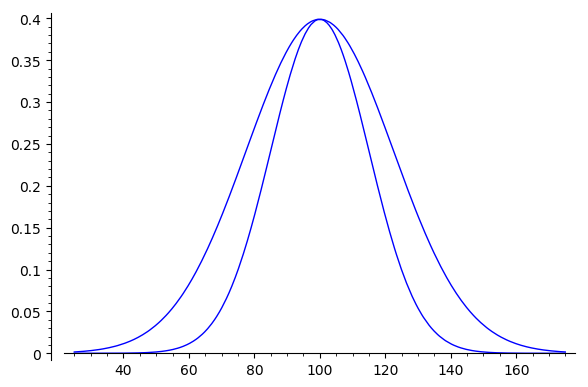

In [119]:
prob_plot = plot(prob_pdf, (mu_prob - 5*sigma_prob, mu_prob + 5*sigma_prob))
prob_regressed_plot = plot(prob_regressed_pdf, (mu_prob - 5*sigma_prob, mu_prob + 5*sigma_prob))

print("正基因概率及其回归概率密度函数")
show(prob_plot+prob_regressed_plot)

print("智商及其回归概率密度函数")
iq_plot = plot(iq_pdf, (25, 175))
iq_regressed_plot = plot(iq_regressed_pdf, (25, 175))
show(iq_plot+iq_regressed_plot)

## 结论
## Conclusion

我们可以从粗鲁知觉得知为什么会有平均回归的现象。因为即使幸运的胚胎得到比父母远远更高的智商，或更高的显性纯合子和杂合子的比例，在其中保证给下一代正向智商作用的显性纯合子的比例依然同样受限，至少在我们的模型里，即在我们模型里我们假设在下一代无论如何显性纯合子与杂合子之间的比例分部保持一致。

We can with some crude intuition see why there would be regression to the mean. Even if a lucky embryo inherits a much higher IQ than what the parents have, or a higher proportion of homozygous dominant and heterozygous dominant genes, the proportion among them of homozygous dominant that would guarantee a positive effect on intelligence on he next generation would be similarly limited (at least in our model), namely that under our model's assumptions, the distribution for the ratio between number of homozygous dominant and heterozygous dominant genes must remained fixed.

如果问反一个方向，那隐性纯合子如果更多，那隐性纯合子在下一代变成杂合子的期望值自然会更高，同样杂合子因为更少退化到隐性纯合子的可能性也更小。

If asked about the other direction, then the answer is that if there are more homozygous recessive alleles, then there would be overall a higher expected number of homozygous recessive alleles becoming heterozygous dominant alleles. Similarly, because there are fewer heterozygous dominant alleles, there is also lower chance of getting such degrading into homozygous recessive.

一个非常聪明的人比普通人的对智商不利的隐性纯合子要少不少。非常聪明的人如果家族大多都非常聪明，那很可能显性纯合子与显性杂合子之间的比例（以上为 $q$）高于其一般比例，使得他的孩子的智商平均回归的程度会比大部分跟他差不多聪明的人的智商平均回归的程度要小，当然，平均回归多少和孩子的期望智商很多也要看他的配偶的智商基因分部。

A very smart person, compared to an average person, would have much fewer homozygous recessive alleles, which are by definition deleterious for intelligence. A very smart person, if hailing from a family in which most people are very smart, would very likely have a ratio between homozygous dominant and heterozygous dominant (defined as $q$ above) that is higher than its typical ratio, which causes the extent of the regression to the mean of intelligence of his children to be much lower than that same regression on the children of most other people of similar intelligence.

少数智商精英如果长期内婚度高（比如分支于古闪米特人或阿拉伯人的犹太人或印度种性制度的波罗门），会导致 $q$ 的增长，即回归到更高的精英子群体的平均智商。

A minority of cognitive elites maintaing endogamy over many generations (such as the Ashkenazi Jews, who are a branch off the Semitic peoples/Arabs or Brahmins in the Indian caste system) would evolve a higher $q$, which would cause regression to a higher than average mean of the elite population. 

进化选择如何导致的 $q$ 的改变的问题，希望将来更细致地量化地探索。

We hope to eventually investigae in more detail and more quantitatively the question of how evolutionary selection causes $q$ to change.